In [24]:
#Import the necessary libraries:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
from google.colab import files
uploaded =files.upload()

Saving Unemployment in India.csv to Unemployment in India.csv


In [8]:
#Load the data into a Pandas DataFrame
unemployment_data = pd.read_csv("/content/Unemployment in India.csv")


In [10]:
# Display the first few rows of the dataset
unemployment_data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [12]:
# Display the columns of the dataset
unemployment_data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [15]:
# Display the dimensions of the dataset
unemployment_data.shape

(768, 7)

In [16]:
# Display the size of the dataset
unemployment_data.size

5376

In [17]:
# Display the dimensions of the dataset
unemployment_data['Region'].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

In [73]:
unemployment_data['Region'].unique()



array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [21]:
# Check for missing values
unemployment_data.isnull()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
763,True,True,True,True,True,True,True
764,True,True,True,True,True,True,True
765,True,True,True,True,True,True,True
766,True,True,True,True,True,True,True


In [22]:
# Check for missing values
unemployment_data.isnull().sum()




Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [23]:
# Summary statistics
unemployment_data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


**Preprocessing of data**

In [25]:
# Handle missing values (if any)
unemployment_data = unemployment_data.dropna()



In [26]:
unemployment_data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [38]:
unemployment_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    740 non-null    object        
 1    Date                                     740 non-null    datetime64[ns]
 2    Frequency                                740 non-null    object        
 3    Estimated Unemployment Rate (%)          740 non-null    float64       
 4    Estimated Employed                       740 non-null    float64       
 5    Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                      740 non-null    object        
 7   Estimated Unemployment Rate (%)           740 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 52.0+ KB


In [33]:
# Convert date column to datetime type (if not already)
unemployment_data[' Date'] = pd.to_datetime(unemployment_data[' Date'])

In [35]:
unemployment_data[' Date']

0     2019-05-31
1     2019-06-30
2     2019-07-31
3     2019-08-31
4     2019-09-30
         ...    
749   2020-02-29
750   2020-03-31
751   2020-04-30
752   2020-05-31
753   2020-06-30
Name:  Date, Length: 740, dtype: datetime64[ns]

In [31]:
# Calculate the unemployment rate using  column names from our dataset
unemployment_data['Estimated Unemployment Rate (%)'] = (unemployment_data[' Estimated Employed'] / unemployment_data[' Estimated Labour Participation Rate (%)']) * 100


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

**Visualize the unemployment rate over time:**

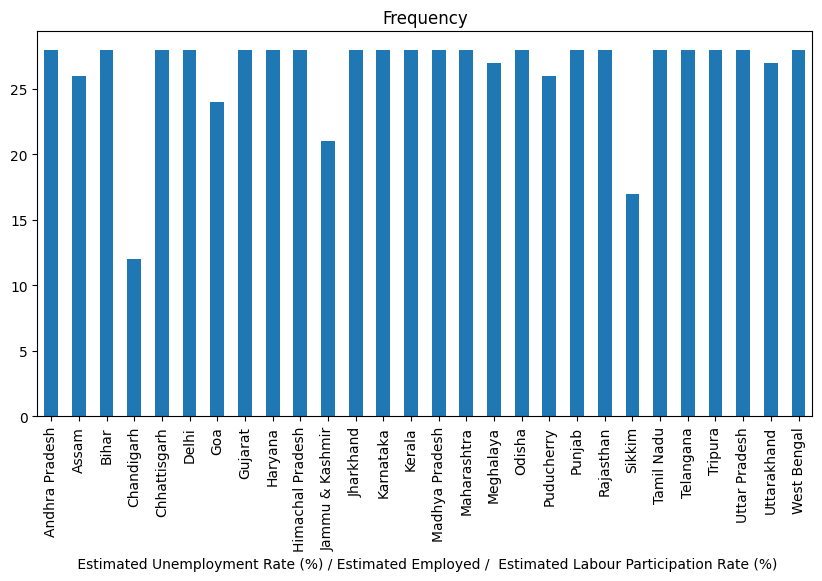

In [55]:
ax=unemployment_data['Region'].value_counts().sort_index().plot(kind='bar',title='Frequency',figsize=(10,5))
ax.set_xlabel(' Estimated Unemployment Rate (%) / Estimated Employed /Estimated Labour Participation Rate (%)')
plt.show()

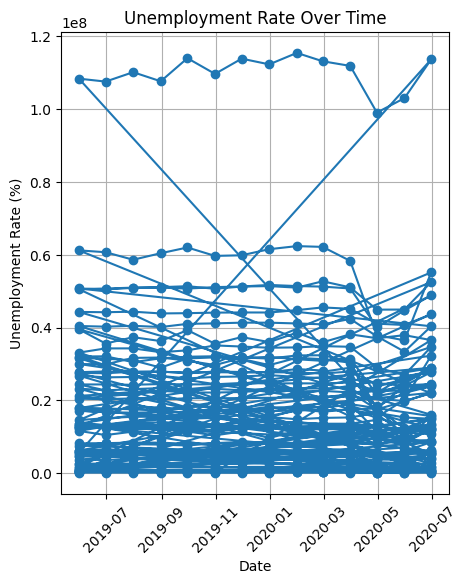

In [52]:
# Plotting the unemployment rate over time
plt.figure(figsize=(5, 6))
plt.plot(unemployment_data[' Date'], unemployment_data['Estimated Unemployment Rate (%)'], marker='o', linestyle='-')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
